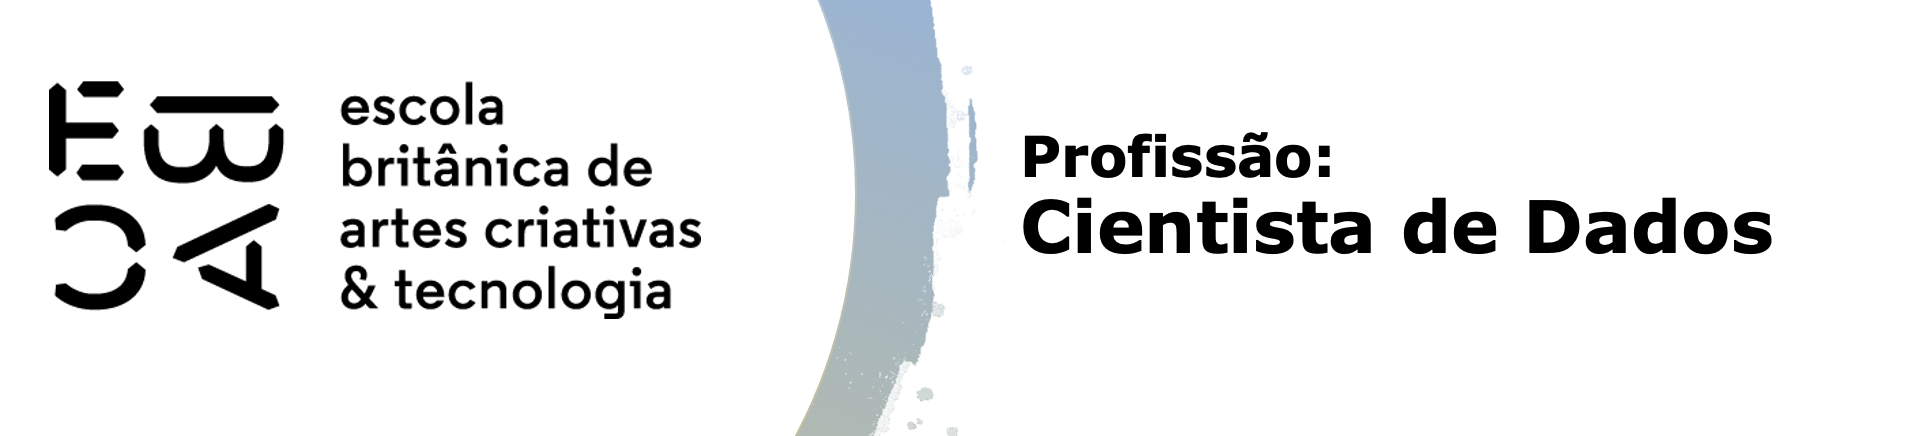

### **Módulo 17 | Árvores II (Parte II: árvore de classificação) | Exercício 3

**Aluno:** [Diego Perez Bezzi Vilas Boas](https://www.linkedin.com/in/diegobezzi/)<br>
**Data:** 30 de abril de 2024.<br>


----

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [10]:
_X_train = pd.read_csv(
    filepath_or_buffer='C:\\Users\\User\\Desktop\\Anaconda Projects\\Modulo 17\\base\\X_train.csv', 
    index_col=['Unnamed: 0', 'subject_train'])
_X_train

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z
,subject_train,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362
...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233
7348,30,0.273853,-0.007749,-0.147468
7349,30,0.273387,-0.017011,-0.045022


In [11]:
y_train = (pd.read_csv(
    filepath_or_buffer='C:\\Users\\User\\Desktop\\Anaconda Projects\\Modulo 17\\base\\y_train.txt', 
    header=None).squeeze('columns'))
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [12]:
_X_test = pd.read_csv(
    filepath_or_buffer='C:\\Users\\User\\Desktop\\Anaconda Projects\\Modulo 17\\base\\X_test.csv', 
    index_col=['Unnamed: 0', 'subject_test'])
_X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [13]:
y_test = (pd.read_csv(
    filepath_or_buffer='C:\\Users\\User\\Desktop\\Anaconda Projects\\Modulo 17\\base\\y_test.txt', 
    header=None).squeeze('columns'))
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [16]:
%%time

cols = ['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z']

X_train = _X_train[cols]
X_test  = _X_test [cols]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

clf = DecisionTreeClassifier(min_samples_leaf=20, 
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train, 
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
Quantidade de ccp_alphas: 233
CPU times: total: 78.1 ms
Wall time: 108 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [17]:
%%time

clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf, 
                    param_grid=grid_parametros, 
                    cv=10, 
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
CPU times: total: 29.4 s
Wall time: 30.9 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,0.123554,0.008580,0.002296,0.000471,0.000484,{'ccp_alpha': 0.00048384996698380874},0.415761,0.459239,0.419048,0.423129,0.419048,0.453061,0.462585,0.500680,0.496599,0.502041,0.455119,0.033541,1
16,0.156307,0.025429,0.003214,0.001182,0.000525,{'ccp_alpha': 0.0005252368321589738},0.434783,0.468750,0.434014,0.420408,0.413605,0.450340,0.458503,0.499320,0.492517,0.478912,0.455115,0.028153,2
19,0.129857,0.017729,0.002220,0.000778,0.000908,{'ccp_alpha': 0.0009075692497005922},0.456522,0.461957,0.453061,0.423129,0.416327,0.453061,0.457143,0.455782,0.500680,0.454422,0.453208,0.021517,3
17,0.126738,0.010247,0.001732,0.000797,0.000615,{'ccp_alpha': 0.00061543524669367},0.444293,0.468750,0.421769,0.420408,0.417687,0.450340,0.468027,0.474830,0.496599,0.463946,0.452665,0.025174,4
18,0.121605,0.011798,0.002139,0.000519,0.000731,{'ccp_alpha': 0.0007307808962765637},0.451087,0.466033,0.451701,0.410884,0.413605,0.453061,0.466667,0.461224,0.492517,0.457143,0.452392,0.023088,5
14,0.125171,0.016387,0.001809,0.000604,0.000449,{'ccp_alpha': 0.0004494670133357165},0.398098,0.464674,0.417687,0.425850,0.416327,0.454422,0.465306,0.491156,0.499320,0.488435,0.452128,0.033886,6
13,0.118033,0.009175,0.001791,0.000597,0.000396,{'ccp_alpha': 0.0003963708882518772},0.417120,0.461957,0.420408,0.419048,0.404082,0.451701,0.478912,0.454422,0.491156,0.484354,0.448316,0.029783,7
12,0.115199,0.002311,0.001790,0.000745,0.000343,{'ccp_alpha': 0.0003433675092034457},0.406250,0.460598,0.429932,0.401361,0.379592,0.450340,0.477551,0.446259,0.502041,0.489796,0.444372,0.038080,8
20,0.126830,0.008487,0.002281,0.001636,0.001193,{'ccp_alpha': 0.0011931198191755046},0.445652,0.478261,0.410884,0.413605,0.414966,0.443537,0.435374,0.444898,0.485714,0.442177,0.441507,0.024076,9
11,0.116961,0.005422,0.002277,0.000758,0.000306,{'ccp_alpha': 0.00030572297808887077},0.388587,0.444293,0.424490,0.385034,0.391837,0.462585,0.477551,0.443537,0.478912,0.451701,0.434853,0.034003,10


In [18]:
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n melhor test_score:')
print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)


 melhor test_score:
	 mean_test_score: 0.45511904761904765
	 param_ccp_alpha: 0.00048384996698380874


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.000484
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.44451985069562266


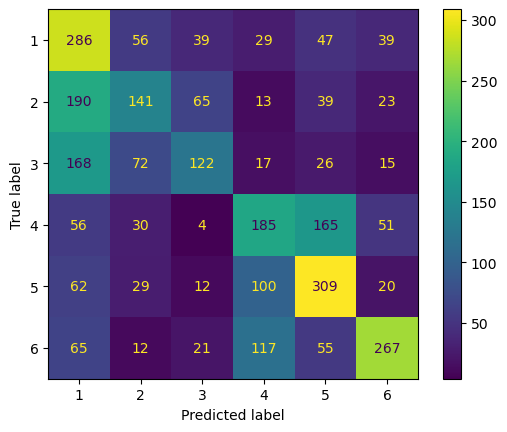

CPU times: total: 484 ms
Wall time: 632 ms


In [19]:
%%time

clf = DecisionTreeClassifier(random_state=42, 
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [22]:
%%time

matriz = confusion_matrix(y_true=y_test, 
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos, 
                   'erros':erros}, 
             index=pd.Index(data=list(range(1,7)), 
                            name='classe')
            ).sort_values(by='erros', 
                          ascending=False)

CPU times: total: 15.6 ms
Wall time: 11 ms


,acertos,erros
classe,,
1,286,541
5,309,332
4,185,276
2,141,199
6,267,148
3,122,141


In [26]:
print(y_train.value_counts().sort_index())

y_train_1 = pd.Series(data=(y_train == 1), 
                      name='classe_1')
y_train_1.value_counts()

0
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: count, dtype: int64


classe_1
False    6126
True     1226
Name: count, dtype: int64

In [27]:
%%time

clf_1 = DecisionTreeClassifier(min_samples_leaf=20, 
                               max_depth=4, 
                               random_state=42).fit(X=_X_train, 
                                                    y=y_train_1)

melhores_classes = (pd.DataFrame(data={'var': _X_train.columns, 
                                       'feature_importances_': clf_1.feature_importances_})
                      .sort_values(by='feature_importances_', 
                                   ascending=False))
cols_classe1 = melhores_classes['var'].values[:3]
print('3 melhores variáveis:', cols_classe1, '\n')

cols_1 = cols + cols_classe1.tolist()
X_train = _X_train[cols_1]
X_test = _X_test[cols_1]
print('X_train: \n', X_train.columns)
print('X_test: \n', X_test.columns)

3 melhores variáveis: ['1 tBodyAcc-mean()-X' '2 tBodyAcc-mean()-Y' '3 tBodyAcc-mean()-Z'] 

X_train: 
 Index(['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z',
       '1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z'],
      dtype='object')
X_test: 
 Index(['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z',
       '1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z'],
      dtype='object')
CPU times: total: 46.9 ms
Wall time: 47.4 ms


In [28]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train, 
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2, 
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]}, 
                      cv=10, 
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score')

Fitting 10 folds for each of 83 candidates, totalling 830 fits
CPU times: total: 2min 56s
Wall time: 3min 5s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
75,0.270465,0.082751,0.002946,0.004473,0.000587,{'ccp_alpha': 0.0005867485732051255},0.445652,0.476902,0.421769,0.419048,0.424490,0.453061,0.466667,0.497959,0.493878,0.469388,0.456881,0.027501,1
72,0.212506,0.015150,0.002517,0.004979,0.000477,{'ccp_alpha': 0.0004773182395918106},0.415761,0.463315,0.420408,0.425850,0.416327,0.457143,0.461224,0.500680,0.499320,0.502041,0.456207,0.033828,2
73,0.210696,0.007576,0.001396,0.000914,0.00051,{'ccp_alpha': 0.0005095067627593527},0.433424,0.466033,0.434014,0.419048,0.416327,0.450340,0.458503,0.503401,0.496599,0.480272,0.455796,0.029250,3
74,0.210911,0.009865,0.001596,0.000914,0.000521,{'ccp_alpha': 0.0005211869853799737},0.433424,0.468750,0.434014,0.420408,0.413605,0.450340,0.458503,0.497959,0.492517,0.480272,0.454979,0.028162,4
77,0.248168,0.041778,0.001762,0.004658,0.000759,{'ccp_alpha': 0.0007594924052035431},0.456522,0.466033,0.453061,0.421769,0.413605,0.450340,0.468027,0.458503,0.492517,0.457143,0.453752,0.021321,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.210795,0.007804,0.002292,0.000758,0.000124,{'ccp_alpha': 0.0001239269737637529},0.354620,0.394022,0.376871,0.348299,0.372789,0.414966,0.417687,0.412245,0.404082,0.368707,0.386429,0.024258,79
2,0.215506,0.013055,0.002087,0.000814,0.000121,{'ccp_alpha': 0.0001211791472944901},0.354620,0.394022,0.376871,0.348299,0.372789,0.412245,0.417687,0.412245,0.404082,0.368707,0.386157,0.023949,80
0,0.195519,0.010548,0.001932,0.000862,0.0,{'ccp_alpha': 0.0},0.351902,0.387228,0.375510,0.348299,0.372789,0.414966,0.416327,0.412245,0.402721,0.370068,0.385206,0.024176,81
1,0.200918,0.012533,0.002434,0.000618,0.000116,{'ccp_alpha': 0.00011561479869423284},0.353261,0.391304,0.376871,0.346939,0.372789,0.410884,0.417687,0.412245,0.398639,0.370068,0.385069,0.023666,82


In [30]:
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n melhor test_score:')
print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)


 melhor test_score:
	 mean_test_score: 0.45688128512274473
	 param_ccp_alpha: 0.0005867485732051255


Parâmetro                    Valor
ccp_alpha                 0.000587
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.44248388191381066


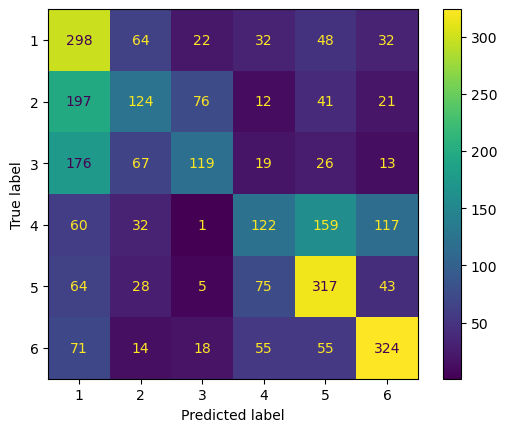

CPU times: total: 531 ms
Wall time: 546 ms


In [31]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42, 
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2, 
                                      X=X_test, 
                                      y=y_test)
plt.show()